In [2]:
# General
import os
import re
import sklearn
import nltk
import numpy as np
import pandas as pd
import contractions
import pickle
# Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# models
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist
# Plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
import seaborn as sns
# Enable inline plotting  
%matplotlib inline

# Data India 

In [3]:
f = open('pipedata-simon/electricity_India/clean_texts.pkl', 'rb')   
data1 = pd.DataFrame(pickle.load(f),columns=None) 

In [4]:
f = open('pipedata-simon/prices_India/clean_texts.pkl', 'rb')   
data2 = pd.DataFrame(pickle.load(f)) 

In [5]:
f = open('pipedata-simon/renewable_India/clean_texts.pkl', 'rb')   
data3 = pd.DataFrame(pickle.load(f)) 

In [6]:
data1.index = range(len(data1))
data2.index = range(len(data2))
data3.index = range(len(data3))

In [7]:
data = pd.concat([data1,data2,data3],axis=0)
data = shuffle(data)
data.index = range(len(data))

In [8]:
data_India = data

# Data UK

In [9]:
f = open('pipedata-simon/electricity_UK/clean_texts.pkl', 'rb')   
data1 = pd.DataFrame(pickle.load(f),columns=None) 

In [10]:
f = open('pipedata-simon/prices_UK/clean_texts.pkl', 'rb')   
data2 = pd.DataFrame(pickle.load(f)) 

In [11]:
f = open('pipedata-simon/renewable_UK/clean_texts.pkl', 'rb')   
data3 = pd.DataFrame(pickle.load(f)) 

In [12]:
data1.index = range(len(data1))
data2.index = range(len(data2))
data3.index = range(len(data3))

In [13]:
data = pd.concat([data1,data2,data3],axis=0)
data = shuffle(data)
data.index = range(len(data))

In [14]:
data_UK = data

# Data Nigeria

In [15]:
f = open('pipedata-simon/electricity_Nigeria/clean_texts.pkl', 'rb')   
data1 = pd.DataFrame(pickle.load(f),columns=None) 

In [16]:
f = open('pipedata-simon/prices_Nigeria/clean_texts.pkl', 'rb')   
data2 = pd.DataFrame(pickle.load(f)) 

In [17]:
f = open('pipedata-simon/renewable_Nigeria/clean_texts.pkl', 'rb')   
data3 = pd.DataFrame(pickle.load(f)) 

In [18]:
data1.index = range(len(data1))
data2.index = range(len(data2))
data3.index = range(len(data3))

In [19]:
data = pd.concat([data1,data2,data3],axis=0)
data = shuffle(data)
data.index = range(len(data))

In [20]:
data_Nigeria = data

# Data USA 

In [21]:
f = open('pipedata-simon/electricity_USA/clean_texts.pkl', 'rb')   
data1 = pd.DataFrame(pickle.load(f),columns=None) 

In [22]:
f = open('pipedata-simon/prices_USA/clean_texts.pkl', 'rb')   
data2 = pd.DataFrame(pickle.load(f)) 

In [23]:
f = open('pipedata-simon/renewable_USA/clean_texts.pkl', 'rb')   
data3 = pd.DataFrame(pickle.load(f)) 

In [24]:
data1.index = range(len(data1))
data2.index = range(len(data2))
data3.index = range(len(data3))

In [25]:
data = pd.concat([data1,data2,data3],axis=0)
data = shuffle(data)
data.index = range(len(data))

In [26]:
data_USA = data

## Preprocess

In [27]:
def pre_process(data):
    corpus = data[0]
    corpus = corpus.drop_duplicates() 
    corpus = corpus.dropna()
    return corpus

In [28]:
corpus_India = pre_process(data_India)
corpus_Nigeria = pre_process(data_Nigeria)
corpus_UK = pre_process(data_UK)
corpus_USA = pre_process(data_USA)

In [29]:
len(corpus_India)

1024

In [30]:
len(corpus_Nigeria)

1050

In [31]:
len(corpus_UK)

1038

In [32]:
len(corpus_USA)

1084

In [33]:
from yellowbrick.text import DispersionPlot

/Users/mahzadkhoshlessan/miniconda3/envs/omdena/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
text_India = [doc.split() for doc in corpus_India]
text_Nigeria = [doc.split() for doc in corpus_Nigeria]
text_UK = [doc.split() for doc in corpus_UK]
text_USA = [doc.split() for doc in corpus_USA]

In [69]:
target_words = ['wind','fuel','solar','nuclear','supply','water','affordable','available','access'
                ,'electricity','power','energy','renewable']

/Users/mahzadkhoshlessan/miniconda3/envs/omdena/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


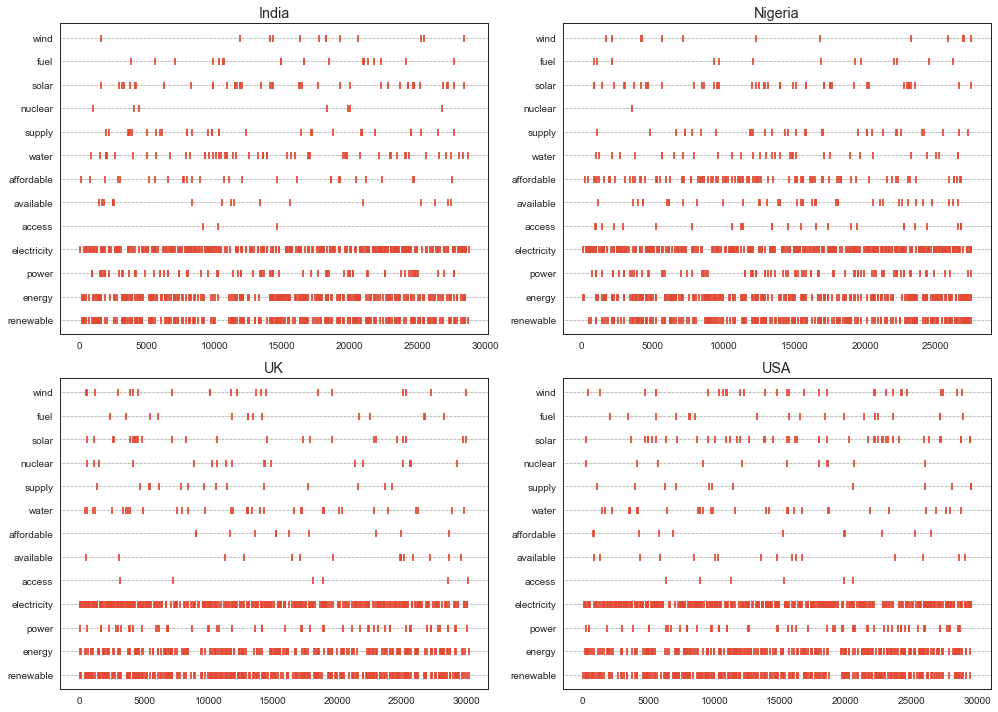

In [70]:
import matplotlib
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
matplotlib.rcParams['legend.fontsize'] = 60
plt.style.use('ggplot')
sns.set_style('ticks')

v1 = DispersionPlot(target_words,ax=ax[0,0])
v1.fit(text_India)
v1.ax.set_title('India')
v1.ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

v2 = DispersionPlot(target_words,ax=ax[0,1])
v2.fit(text_Nigeria)
v2.ax.set_title('Nigeria')
v2.ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

v3 = DispersionPlot(target_words,ax=ax[1,0])
v3.fit(text_UK)
v3.ax.set_title('UK')
v3.ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

v4 = DispersionPlot(target_words,ax=ax[1,1])
v4.fit(text_USA)
v4.ax.set_title('USA')
v4.ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

plt.tight_layout()
fig_name = 'Dispersion_plot'
fig.savefig('{}.png'.format(fig_name), bbox_inches='tight')

## Feature Extraction

In [37]:
from yellowbrick.text import FreqDistVisualizer

In [38]:
def featureextraction(corpus):
    
    vectorizer = TfidfVectorizer(max_df=.5,min_df=1,max_features=None,ngram_range=(1, 3),norm=None,binary=True,
                             use_idf=False,sublinear_tf=False,strip_accents = 'unicode',stop_words = 'english')
    vectorizer = vectorizer.fit(corpus)
    tfidf = vectorizer.transform(corpus)
    vocab = vectorizer.get_feature_names()

    return tfidf, vocab

Text(0.5, 1.0, 'USA')

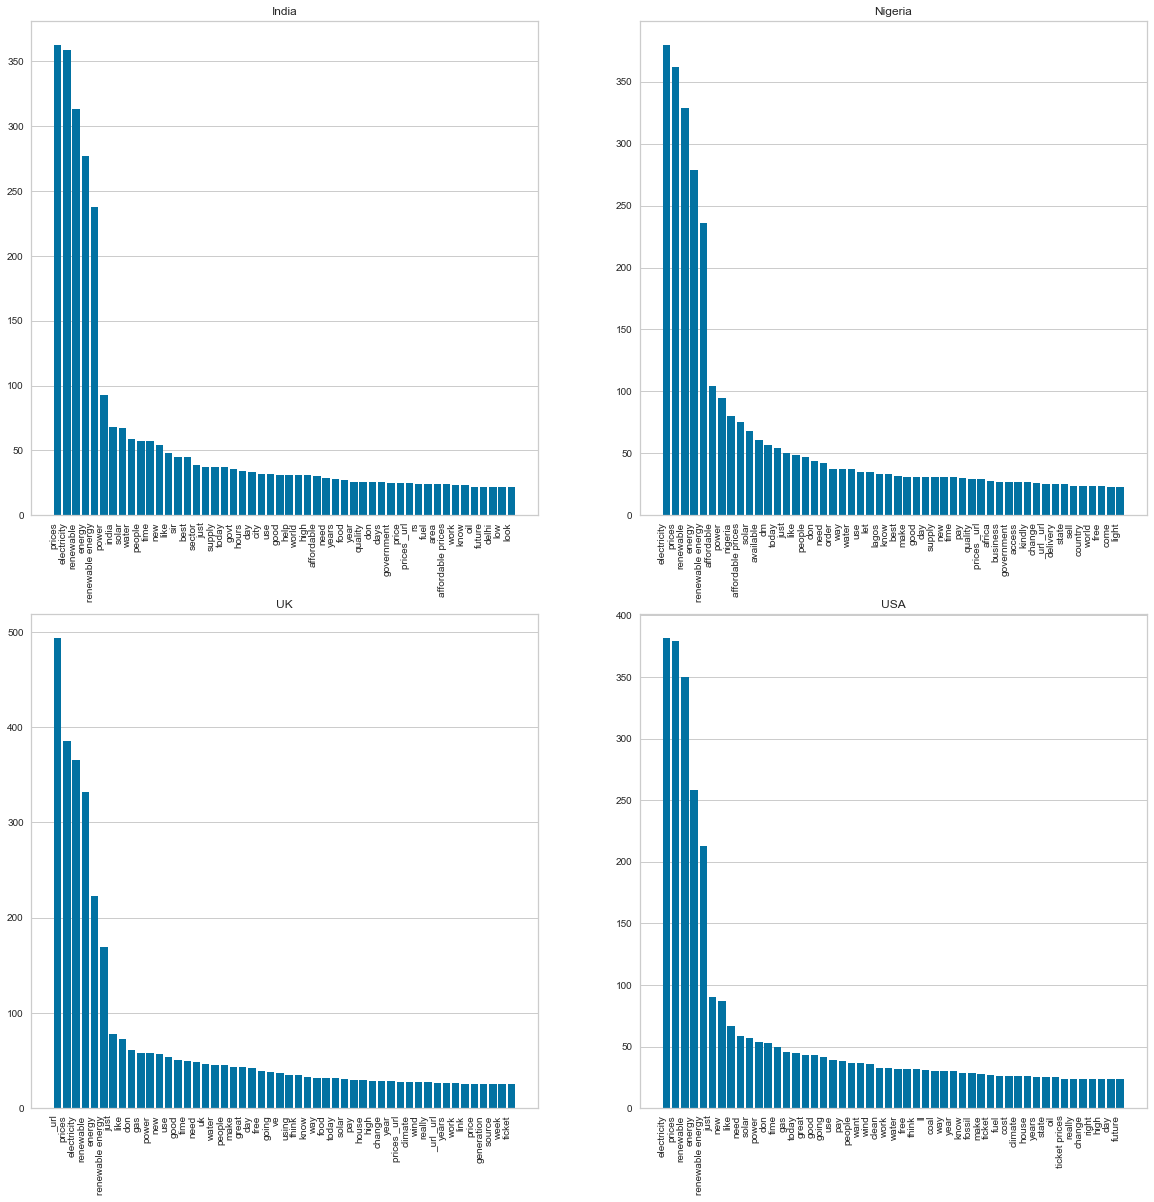

In [39]:
f, ax = plt.subplots(2, 2, figsize=(20, 20))

tfidf1, vocab1 = featureextraction(corpus_India)
v1 = FreqDistVisualizer(features=vocab1, orient='v',ax=ax[0,0])
v1.fit(tfidf1)
v1.ax.set_title('India')

tfidf2, vocab2 = featureextraction(corpus_Nigeria)
v2 = FreqDistVisualizer(features=vocab2, orient='v',ax=ax[0,1])
v2.fit(tfidf2)
v2.ax.set_title('Nigeria')

tfidf3, vocab3 = featureextraction(corpus_UK)
v3 = FreqDistVisualizer(features=vocab3, orient='v',ax=ax[1,0])
v3.fit(tfidf3)
v3.ax.set_title('UK')

tfidf4, vocab4 = featureextraction(corpus_USA)
v4 = FreqDistVisualizer(features=vocab4, orient='v',ax=ax[1,1])
v4.fit(tfidf4)
v4.ax.set_title('USA')

In [40]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

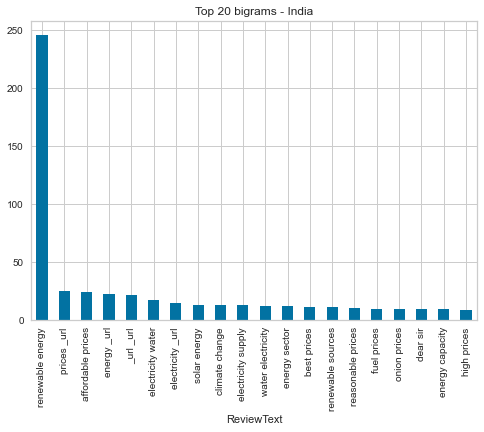

In [42]:
common_words = get_top_n_bigram(corpus_India, 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams - India')

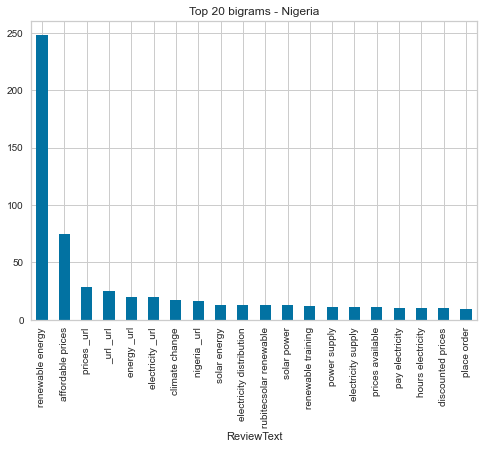

In [43]:
common_words = get_top_n_bigram(corpus_Nigeria, 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams - Nigeria')

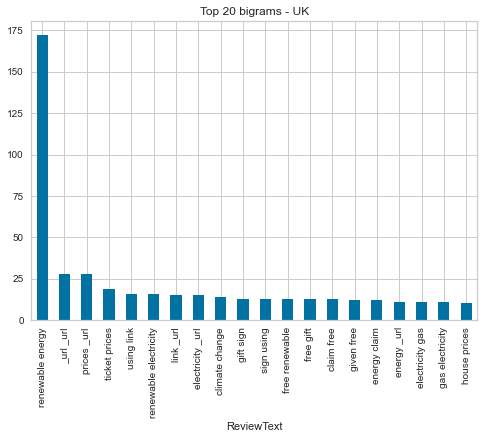

In [44]:
common_words = get_top_n_bigram(corpus_UK, 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams - UK')

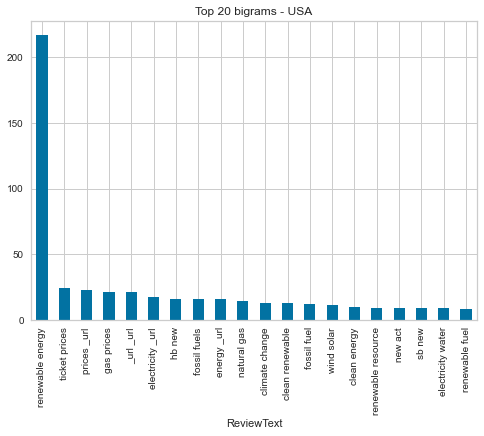

In [44]:
common_words = get_top_n_bigram(corpus_USA, 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams - USA')

In [45]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [55]:
def plot_trigrams(common_words,title):
    import matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    matplotlib.rcParams['legend.fontsize'] = 60
    plt.style.use('ggplot')
    sns.set_style('ticks')
    
    df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
        kind='bar', title='Top 20 trigrams-India')

    plt.tight_layout()
    ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
    fig_name = 'top20_trigrams_{}'.format(title)
    fig.savefig('{}.png'.format(fig_name), bbox_inches='tight')

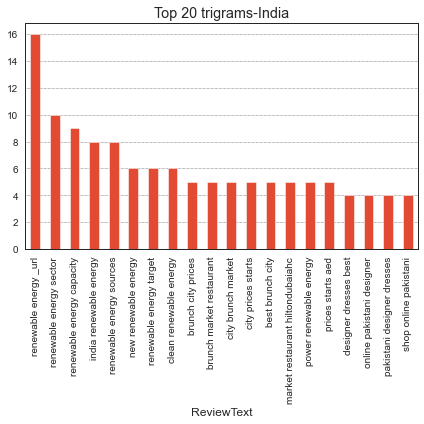

In [56]:
common_words = get_top_n_trigram(corpus_India, 20)
plot_trigrams(common_words,'India')

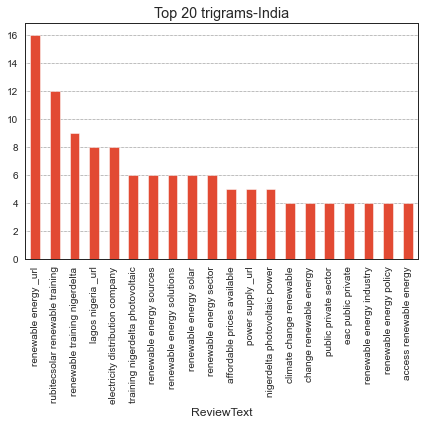

In [57]:
common_words = get_top_n_trigram(corpus_Nigeria, 20)
plot_trigrams(common_words,'Nigeria')

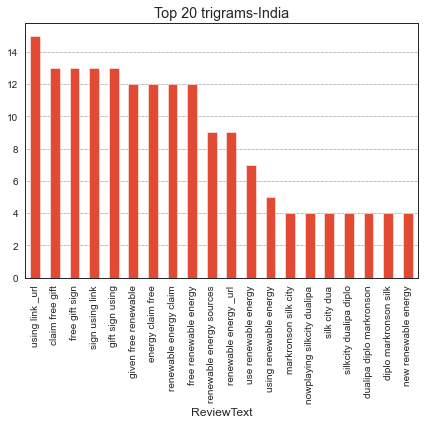

In [58]:
common_words = get_top_n_trigram(corpus_UK, 20)
plot_trigrams(common_words,'UK')

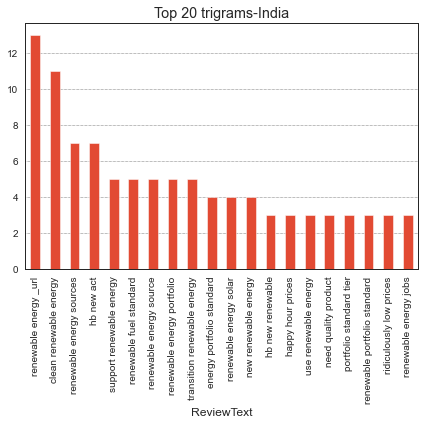

In [59]:
common_words = get_top_n_trigram(corpus_USA, 20)
plot_trigrams(common_words,'USA')

In [50]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [51]:
from collections import defaultdict
from nltk.corpus import stopwords 

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def bigram_coocurrence(corp):
    stopset = set(stopwords.words('english')) 
    filter_stops = lambda w: len(w) < 3 or w in stopset
    
    bi_dict = defaultdict(int)
    bg_measures = BigramAssocMeasures()
    for readme in corp:
        words = nltk.word_tokenize(readme)
        bi_finder = BigramCollocationFinder.from_words(words)
        bi_finder.apply_word_filter(filter_stops) 
        bi_collocs = bi_finder.nbest(bg_measures.likelihood_ratio, 10)    

        for colloc in bi_collocs:
            bi_dict[colloc] += 1
            
    return bi_dict

In [113]:
def colocate_clouds(corp,title):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1)
    bi_dict = bigram_coocurrence(corp)
            
    dd = pd.DataFrame.from_dict(bi_dict,orient='index',dtype='str')
    dff = dd.T
    dff.columns = [str(" ".join(x)) for x in list(dff.columns)]
    dff = dff.astype(int)
    dff = dff.sort_values(by=0,ascending=True, axis=1)
    
    wordcloud = WordCloud(background_color = 'white',width=1600, height=800)
    wordCloud = wordcloud.generate_from_frequencies(dff.iloc[0,-200:])
#     plt.figure(figsize=(8, 8))
    plt.imshow(wordCloud)
    plt.axis("off")
    
    fig_name = 'Collocate_clouds_{}'.format(title)
    fig.savefig('{}.png'.format(fig_name), bbox_inches='tight')

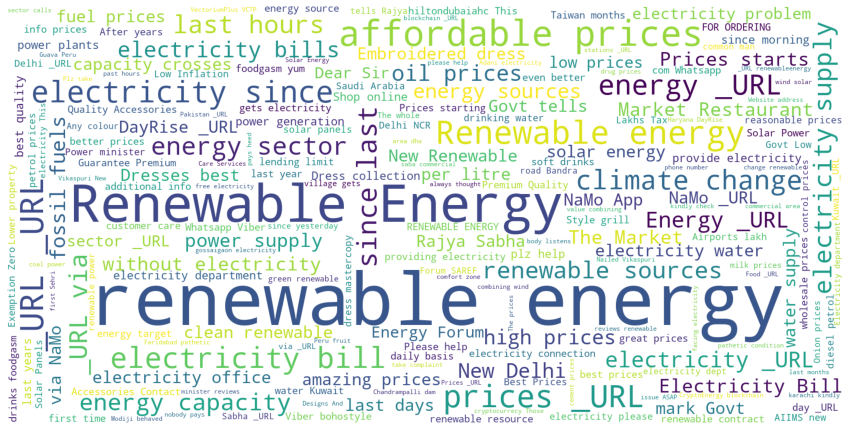

In [114]:
colocate_clouds(corpus_India,'India')

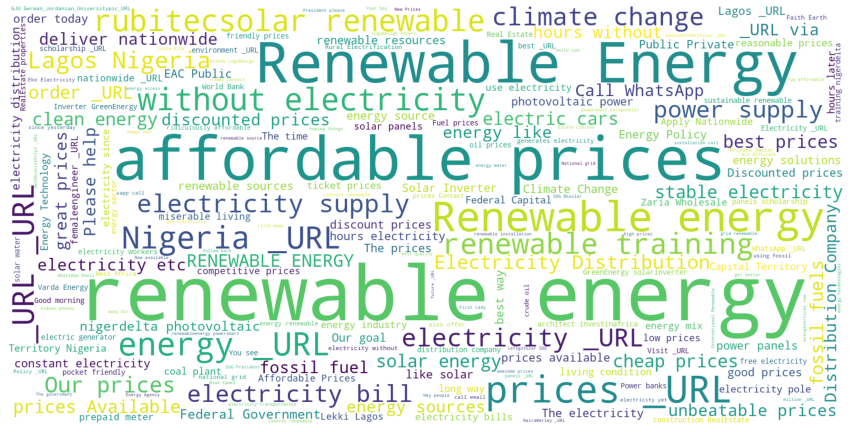

In [115]:
colocate_clouds(corpus_Nigeria,'Nigeria')

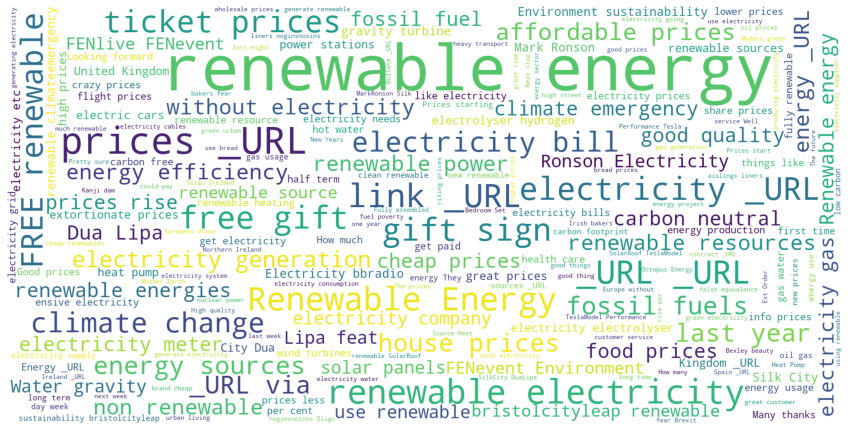

In [116]:
colocate_clouds(corpus_UK,'UK')

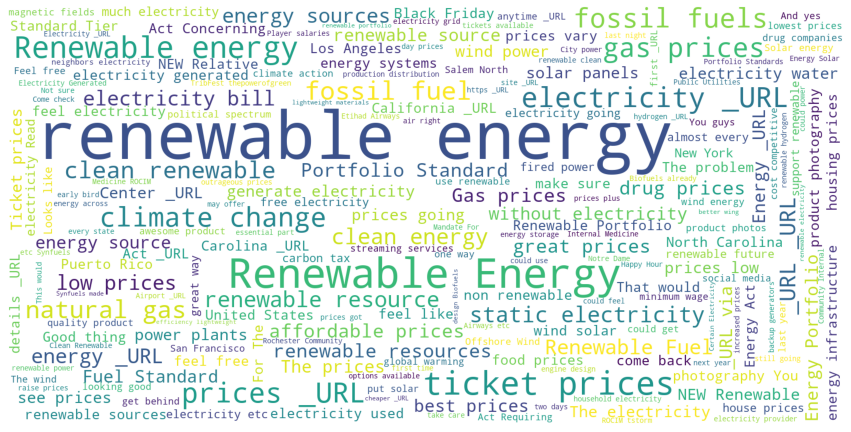

In [117]:
colocate_clouds(corpus_USA,'USA')

In [70]:
import networkx as nx
import matplotlib

In [166]:
def graph_plots(s,title):
    # Create network plot 
    matplotlib.rcParams['legend.fontsize'] = 9
    plt.style.use('ggplot')
    sns.set_style('ticks')
    G = nx.Graph()

    # Create connections between nodes
    for k, v in s.items():
        G.add_edge(k[0], k[1], weight=(v * 10))

    G.add_node("china", weight=100)

    fig, ax = plt.subplots(figsize=(15, 10))

    pos = nx.spring_layout(G, k=2)

    # Plot networks
    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='grey',
                     node_color='purple',
                     with_labels = False,
                     ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+.05, value[1]+.03
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='red', alpha=0.25),
                horizontalalignment='center', fontsize=16)

#     ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
#     ax.xaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')
 
    plt.tight_layout()
    plt.show()
    fig_name = 'Co-occurrence Network_{}'.format(title)
    fig.savefig('{}.png'.format(fig_name), bbox_inches='tight')

In [159]:
bi_dict_India = bigram_coocurrence(corpus_India)

In [160]:
s_India = dict(sorted(bi_dict_India.items(), key=lambda x: x[1], reverse=True)[:25])

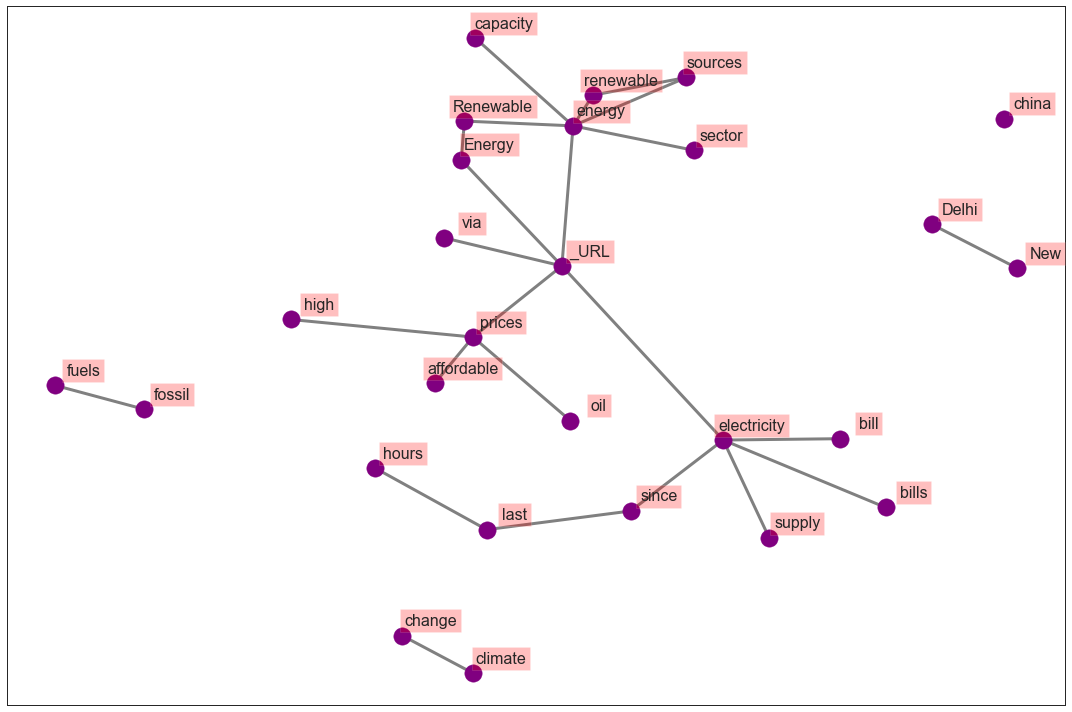

In [167]:
graph_plots(s_India,'India')

In [148]:
bi_dict_Nigeria = bigram_coocurrence(corpus_Nigeria)

In [149]:
s_Nigeria = dict(sorted(bi_dict_Nigeria.items(), key=lambda x: x[1], reverse=True)[:25])

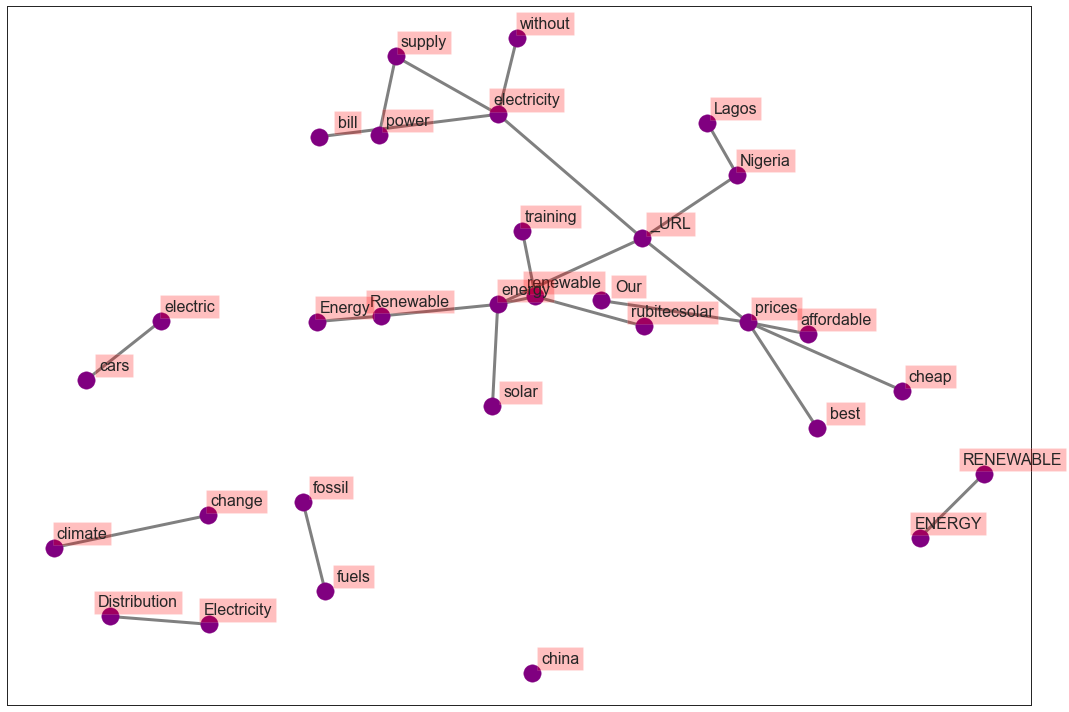

In [168]:
graph_plots(s_Nigeria,'Nigeria')

In [151]:
bi_dict_UK = bigram_coocurrence(corpus_UK)

In [152]:
s_UK = dict(sorted(bi_dict_UK.items(), key=lambda x: x[1], reverse=True)[:25])

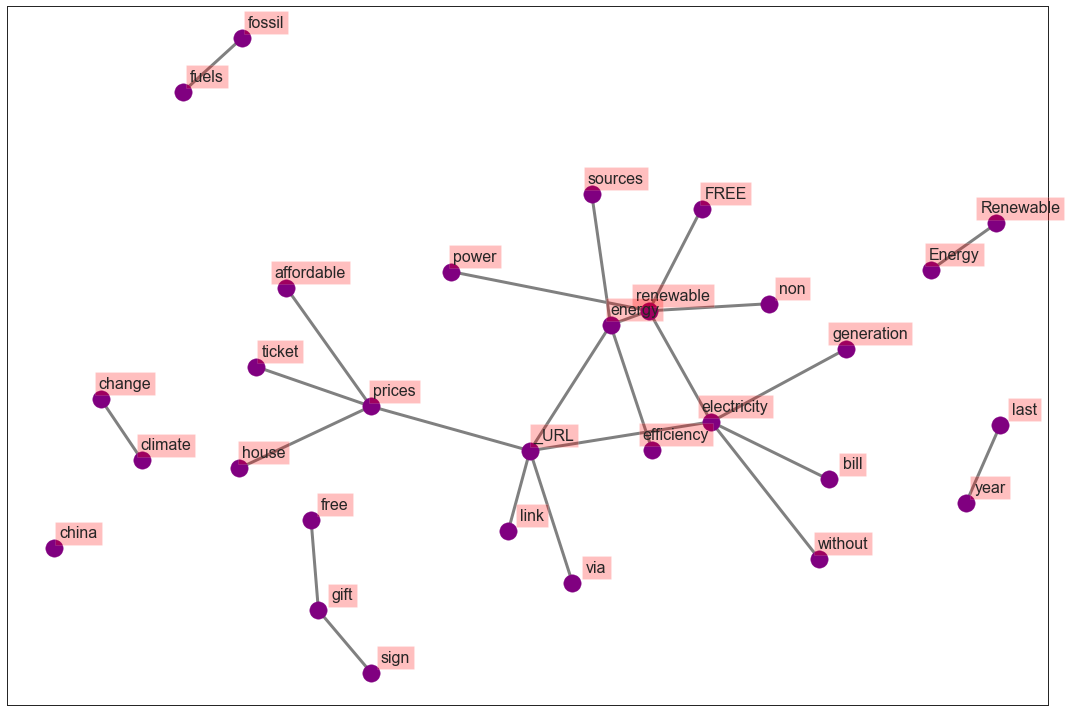

In [169]:
graph_plots(s_UK,'UK')

In [154]:
bi_dict_USA = bigram_coocurrence(corpus_USA)

In [155]:
s_USA = dict(sorted(bi_dict_USA.items(), key=lambda x: x[1], reverse=True)[:25])

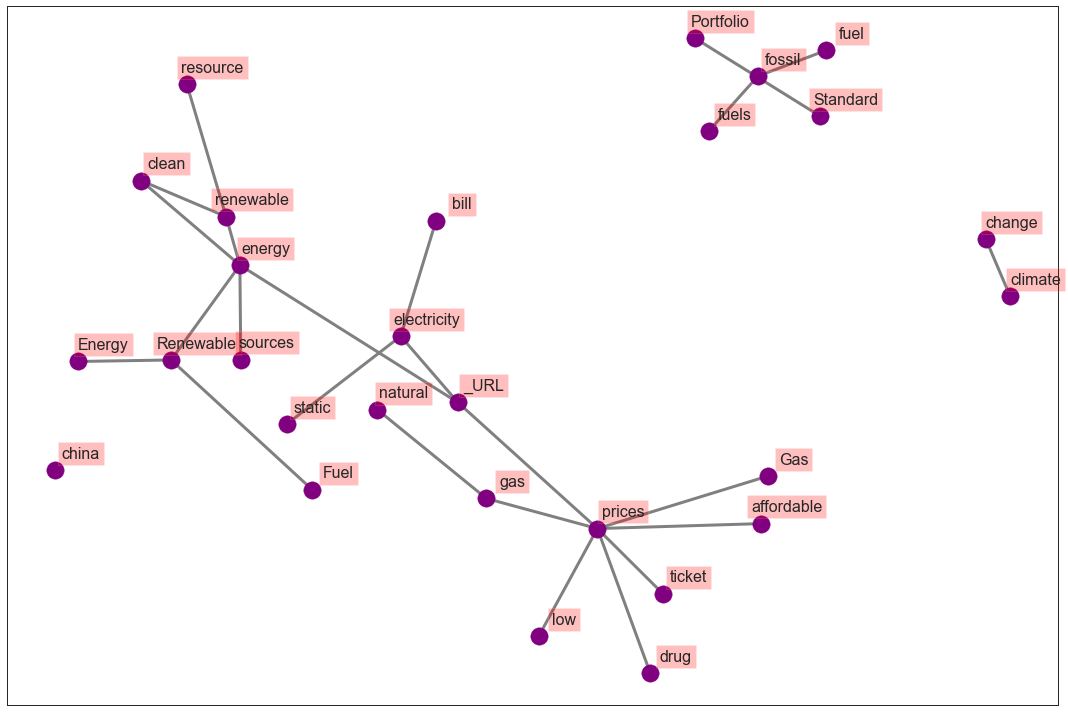

In [170]:
graph_plots(s_USA,'USA')